In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from scipy.spatial.distance import hamming ,cosine ,euclidean 
from tqdm import tqdm
import pickle 
import cv2
import os
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras import Sequential,datasets

%matplotlib inline

LOADING CIFAR10 DataSet


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
import pprint

In [ ]:
from google.colab import files

In [ ]:
imgtest = files.upload()

Saving 2019-01-03 (15).png to 2019-01-03 (15).png


In [ ]:
from PIL import Image

In [ ]:
cv2.imread(imgtest)

TypeError: ignored

In [ ]:
pp = pprint.PrettyPrinter(indent=3)
pp.pprint(X_train[0])

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

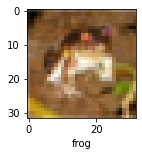

In [ ]:
plot_sample(X_train ,y_train ,0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3),strides = (1,1),padding = "SAME", activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3),strides = (1,1),padding = "SAME", activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(filters=256, kernel_size=(5, 5),strides = (1,1),padding = "SAME", activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 256)         819456    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 256)       

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 581s 371ms/step - loss: 1.4745 - accuracy: 0.4553
Epoch 2/10
1563/1563 [==============================] - 570s 365ms/step - loss: 1.0061 - accuracy: 0.6460
Epoch 3/10
1563/1563 [==============================] - 570s 365ms/step - loss: 0.8220 - accuracy: 0.7149
Epoch 4/10
1563/1563 [==============================] - 576s 368ms/step - loss: 0.6921 - accuracy: 0.7622
Epoch 5/10
1563/1563 [==============================] - 618s 395ms/step - loss: 0.5985 - accuracy: 0.7943
Epoch 6/10
1563/1563 [==============================] - 573s 366ms/step - loss: 0.5082 - accuracy: 0.8263
Epoch 7/10
1563/1563 [==============================] - 592s 379ms/step - loss: 0.4307 - accuracy: 0.8548
Epoch 8/10
1563/1563 [==============================] - 573s 366ms/step - loss: 0.3763 - accuracy: 0.8738
Epoch 9/10
1563/1563 [==============================] - 578s 370ms/step - loss: 0.3215 - accuracy: 0.8910
Epoch 10/10
1563/1563 [=======================

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = F"/content/gdrive/My Drive/cnnModel2M"
cnn.save(path)

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 33s 102ms/step - loss: 1.0337 - accuracy: 0.7313


[1.033678412437439, 0.7312999963760376]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 33s 104ms/step


array([[2.0331159e-05, 3.8928811e-05, 1.0233714e-03, 7.7366203e-01,
        1.3515396e-03, 2.1995054e-01, 6.6245697e-04, 1.4301321e-03,
        9.2302980e-06, 1.8513339e-03],
       [3.2954013e-05, 9.0390675e-02, 6.8211385e-08, 3.3221787e-07,
        2.2618782e-09, 3.0988150e-07, 2.7075954e-08, 3.1947372e-11,
        9.0904218e-01, 5.3332886e-04],
       [7.5920358e-02, 1.9902665e-02, 1.3599916e-02, 6.0175392e-03,
        4.1004634e-03, 5.7559730e-03, 1.8490269e-03, 9.3803235e-04,
        8.5771847e-01, 1.4197648e-02],
       [9.3756503e-01, 5.1005033e-04, 2.0907458e-03, 8.4632699e-04,
        1.9568589e-03, 5.6044173e-05, 1.8678703e-04, 1.7652785e-05,
        5.1082365e-02, 5.6881947e-03],
       [4.8797992e-06, 2.4663614e-05, 1.3419500e-04, 1.1596648e-03,
        8.1049546e-04, 2.5599256e-05, 9.9778348e-01, 1.2763346e-07,
        1.8558025e-05, 3.8464197e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

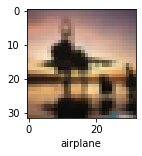

In [ ]:
plot_sample(X_test, y_test,192)

In [ ]:
classes[y_classes[192]]


'airplane'

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77      1000
           1       0.83      0.88      0.85      1000
           2       0.60      0.67      0.63      1000
           3       0.54      0.51      0.52      1000
           4       0.71      0.64      0.67      1000
           5       0.63      0.62      0.62      1000
           6       0.81      0.77      0.79      1000
           7       0.80      0.77      0.78      1000
           8       0.83      0.87      0.85      1000
           9       0.82      0.79      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [ ]:
cnn.save(path + ".h5")